In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import scale, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import metrics
from sklearn import set_config
set_config(transform_output='pandas', display='diagram')

# Data Loading

In [75]:
# Loading dataset
df = pd.read_excel(r"churn.xlsx")
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer,42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [76]:
# Dataset informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7042 entries, 0 to 7041
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7042 non-null   object 
 1   tenure            7042 non-null   int64  
 2   PhoneService      7042 non-null   object 
 3   Contract          7042 non-null   object 
 4   PaperlessBilling  7042 non-null   object 
 5   PaymentMethod     7042 non-null   object 
 6   MonthlyCharges    7042 non-null   float64
 7   TotalCharges      7042 non-null   object 
 8   Churn             7042 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 495.3+ KB


# Data Treatment

In [77]:
# Conveerting TotalCharges to float64
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [78]:
# Columns to be scaled
cols2scale = df[["tenure", "MonthlyCharges", "TotalCharges"]].columns

# Columns to be dummyfied
cols2dummy = df[["PhoneService", "Contract", "PaperlessBilling", "PaymentMethod", "Churn"]].columns

In [79]:
# Applying preprocessing
preprocessing = ColumnTransformer([
    ("num", StandardScaler(), cols2scale),
    ("cat", OneHotEncoder(sparse_output=False, drop="if_binary"), cols2dummy)
])
preprocessing.fit(df)

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                ('cat',
                                 OneHotEncoder(drop='if_binary',
                                               sparse_output=False),
                                 Index(['PhoneService', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn'],
      dtype='object'))])

In [80]:
# Preprocessing transform
df = preprocessing.transform(df)

In [81]:
# Showing dataset info after preprocessng
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7042 entries, 0 to 7041
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   num__tenure                          7042 non-null   float64
 1   num__MonthlyCharges                  7042 non-null   float64
 2   num__TotalCharges                    7031 non-null   float64
 3   cat__PhoneService_Yes                7042 non-null   float64
 4   cat__Contract_Month-to-month         7042 non-null   float64
 5   cat__Contract_One year               7042 non-null   float64
 6   cat__Contract_Two year               7042 non-null   float64
 7   cat__PaperlessBilling_Yes            7042 non-null   float64
 8   cat__PaymentMethod_Bank transfer     7042 non-null   float64
 9   cat__PaymentMethod_Credit card       7042 non-null   float64
 10  cat__PaymentMethod_Electronic check  7042 non-null   float64
 11  cat__PaymentMethod_Mailed chec

In [82]:
# Replacing NaN values in TotalCharges with the median
df["num__TotalCharges"].fillna(
    df["num__TotalCharges"].median(),
    inplace=True
)

In [84]:
# Separating dataset in features and target
df_features = df.drop(columns="cat__Churn_Yes")
target = df["cat__Churn_Yes"]

# Data Modeling

In [119]:
# Separating data in train and test
X_train, X_test, y_train, y_test = train_test_split(df_features, target, test_size=.2)

# Declaring MLP model
mlp = MLPClassifier((20,), activation="logistic")

# Fitting MLP model
mlp.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(20,))

# Model Evaluation

In [120]:
# Predictions with MLP
y_pred = mlp.predict(X_test)

# Metrics for model evaluation
print(f"Accuracy: {metrics.accuracy_score(y_pred, y_test)}")
print(f"Balanced Accuracy: {metrics.balanced_accuracy_score(y_pred, y_test)}")
print(f"Recall: {metrics.recall_score(y_pred, y_test)}")
print(f"Precision: {metrics.precision_score(y_pred, y_test)}")
print(f"F1-score: {metrics.f1_score(y_pred, y_test)}")
print(f"ROCAUC: {metrics.roc_auc_score(y_pred, y_test)}")

Accuracy: 0.7955997161107168
Balanced Accuracy: 0.7414672675321223
Recall: 0.6476510067114094
Precision: 0.5132978723404256
F1-score: 0.5727002967359051
ROCAUC: 0.7414672675321223


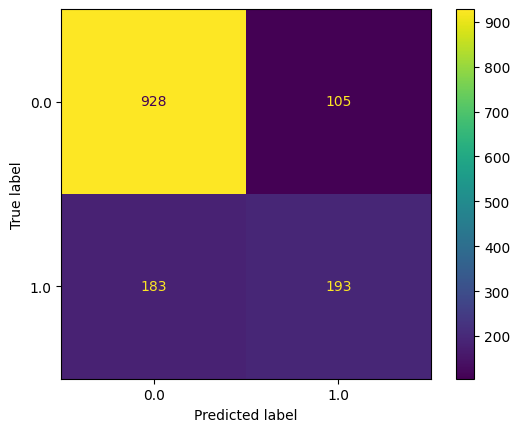

In [121]:
# Confusion matrix
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, labels=mlp.classes_);